In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Define Model

In [2]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

Define a loss function

In [3]:

def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

Obtain training data

In [4]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

Before training the model, visualize the loss value by plotting the model's predictions in red crosses and the training data in blue dots:



In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

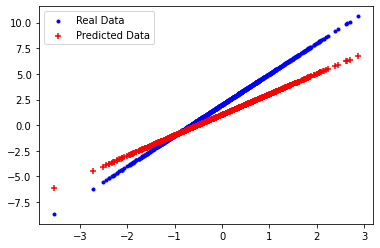

Current loss: 1.916210


In [6]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())


Define a training loop

In [7]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

Finally, you can iteratively run through the training data and see how w and b evolve.



In [8]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.91621
Epoch  1: w=2.18 b=1.20, loss=1.25124
Epoch  2: w=2.33 b=1.36, loss=0.81737
Epoch  3: w=2.46 b=1.49, loss=0.53416
Epoch  4: w=2.56 b=1.59, loss=0.34923
Epoch  5: w=2.64 b=1.67, loss=0.22841
Epoch  6: w=2.70 b=1.74, loss=0.14945
Epoch  7: w=2.76 b=1.79, loss=0.09783
Epoch  8: w=2.80 b=1.83, loss=0.06406
Epoch  9: w=2.84 b=1.87, loss=0.04197
Epoch 10: w=2.87 b=1.89, loss=0.02751
Epoch 11: w=2.89 b=1.91, loss=0.01803
Epoch 12: w=2.91 b=1.93, loss=0.01183
Epoch 13: w=2.93 b=1.94, loss=0.00776
Epoch 14: w=2.94 b=1.96, loss=0.00509


In addition to the values for losses, you also plot the progression of trainable variables over epochs.



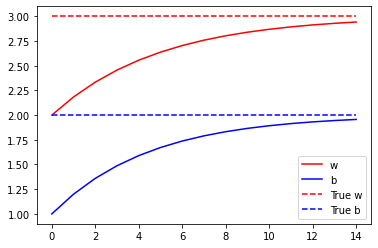

In [9]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

Plots for Evaluation

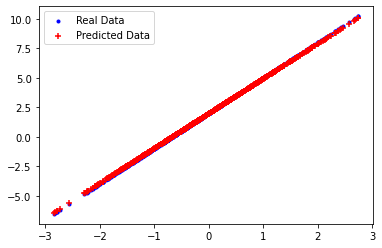

In [10]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.



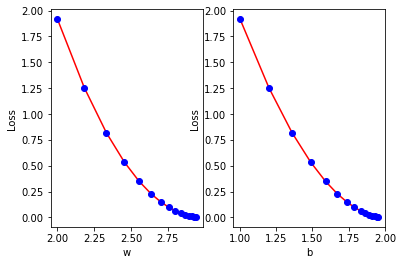

In [11]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)